In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv')

In [3]:

df.head()


,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [4]:

df.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [5]:
df.shape

(3694, 14)

In [6]:
df.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

price


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


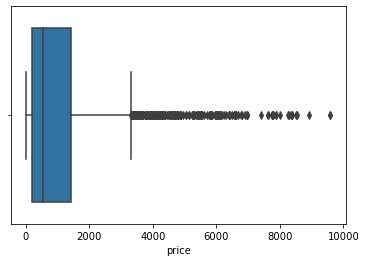

depth


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


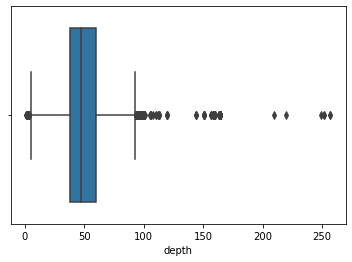

height


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


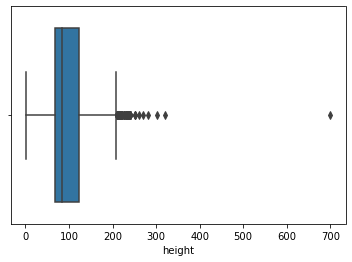

width


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


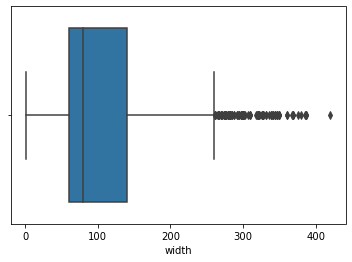

In [7]:
for col in ['price', 'depth', 'height', 'width']:
    print(col)
    sns.boxplot(col,data=df)
    plt.show()

In [8]:
for x in ['price', 'depth', 'height', 'width']:
    q75,q25=np.percentile(df.loc[:,x],[75,25])
    intr_qr=q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x] < min,x]=np.nan
    df.loc[df[x] > max,x]=np.nan

In [9]:
df.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                 276
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [10]:
df['price'].fillna(df['price'].mean(),inplace=True)
df['depth'].fillna(df['depth'].mean(),inplace=True)
df['width'].fillna(df['width'].mean(),inplace=True)
df['height'].fillna(df['height'].mean(),inplace=True)

In [11]:
df.isnull().sum()

Unnamed: 0           0
item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
dtype: int64

price


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


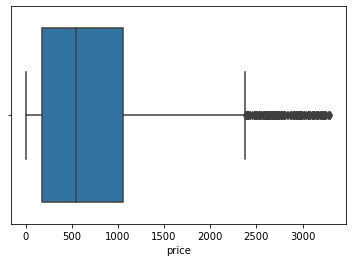

depth


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


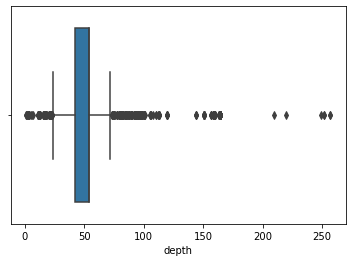

height


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


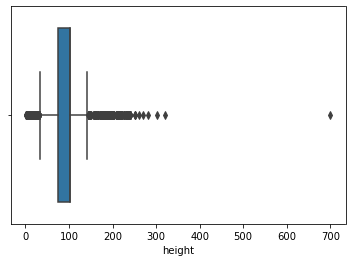

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


width


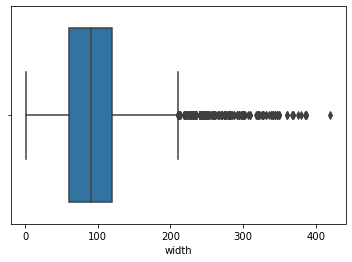

In [12]:
for col in [ 'price','depth', 'height', 'width']:
    print(col)
    sns.boxplot(col,data=df)
    plt.show()

In [13]:
df.head()


,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,54.379202,99.00000,51.000000
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,54.379202,105.00000,80.000000
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,54.379202,101.67997,104.470853
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.000000,100.00000,60.000000
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.000000,43.00000,74.000000


In [14]:
df=df.drop(columns=['item_id','link','short_description'] )
df

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,designer,depth,height,width
0,0,FREKVENS,Bar furniture,265.0,No old price,True,No,Nicholai Wiig Hansen,54.379202,99.00000,51.000000
1,1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,Francis Cayouette,54.379202,105.00000,80.000000
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Francis Cayouette,54.379202,101.67997,104.470853
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,Henrik Preutz,50.000000,100.00000,60.000000
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,Marcus Arvonen,60.000000,43.00000,74.000000
...,...,...,...,...,...,...,...,...,...,...,...
3689,3689,ELVARLI,Wardrobes,750.0,SR 820,True,No,Ehlén Johansson,50.000000,101.67997,91.000000
3690,3690,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,No,Ehlén Johansson,50.000000,101.67997,135.000000
3691,3691,ELVARLI,Wardrobes,924.0,"SR 1,050",True,No,Ehlén Johansson,50.000000,101.67997,175.000000
3692,3692,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,No,Ehlén Johansson,50.000000,101.67997,178.000000


In [15]:
df.sellable_online.value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

In [16]:
df.other_colors.value_counts()

No     2182
Yes    1512
Name: other_colors, dtype: int64

[Text(0, 0, 'Bar furniture'),
 Text(1, 0, 'Beds'),
 Text(2, 0, 'Bookcases & shelving units'),
 Text(3, 0, 'Cabinets & cupboards'),
 Text(4, 0, 'Café furniture'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Chests of drawers & drawer units'),
 Text(7, 0, "Children's furniture"),
 Text(8, 0, 'Nursery furniture'),
 Text(9, 0, 'Outdoor furniture'),
 Text(10, 0, 'Room dividers'),
 Text(11, 0, 'Sideboards, buffets & console tables'),
 Text(12, 0, 'Sofas & armchairs'),
 Text(13, 0, 'Tables & desks'),
 Text(14, 0, 'Trolleys'),
 Text(15, 0, 'TV & media furniture'),
 Text(16, 0, 'Wardrobes')]

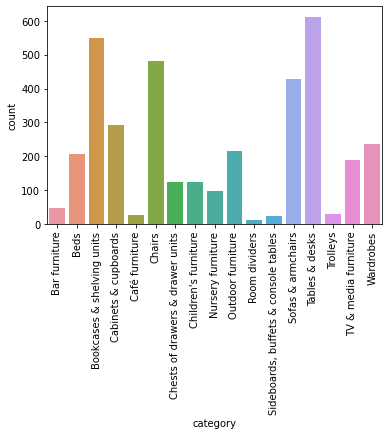

In [17]:
sns.countplot(x=df['category']).set_xticklabels(df['category'].unique(), rotation=90)


In [18]:
 
category_price=df.groupby(['category'] ).agg(
prices = pd.NamedAgg(column = 'price', aggfunc = 'mean' ))

 
category_price

,prices
category,
Bar furniture,679.553191
Beds,1024.146947
Bookcases & shelving units,495.811453
Cabinets & cupboards,683.352577
Café furniture,553.884615
Chairs,771.263030
Chests of drawers & drawer units,612.180000
Children's furniture,272.758065
Nursery furniture,393.659794


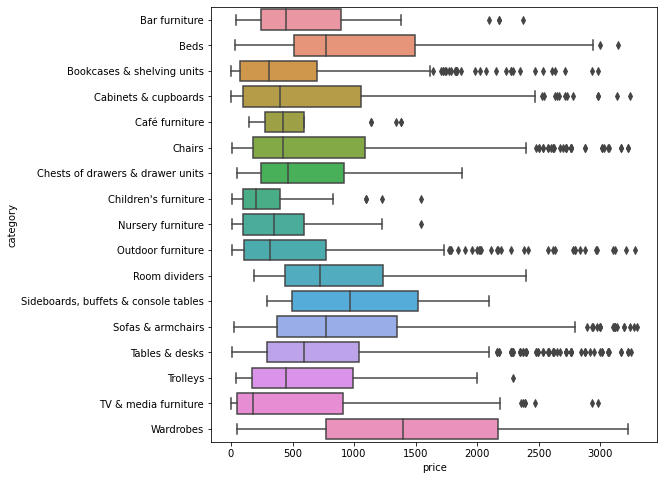

In [19]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=df, x='price', y='category')
plt.show()

In [20]:
category_sellable_online=df.groupby(['category'] ).agg(
sellable_online = pd.NamedAgg(column = 'sellable_online', aggfunc = 'count' ))  
category_sellable_online

,sellable_online
category,
Bar furniture,47
Beds,208
Bookcases & shelving units,548
Cabinets & cupboards,292
Café furniture,26
Chairs,481
Chests of drawers & drawer units,125
Children's furniture,124
Nursery furniture,97


price


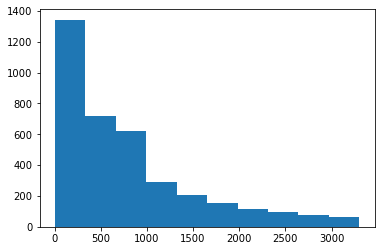

depth


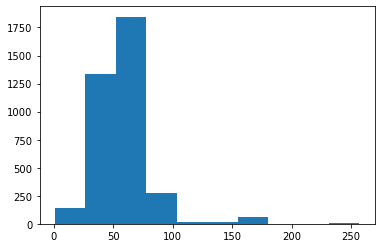

height


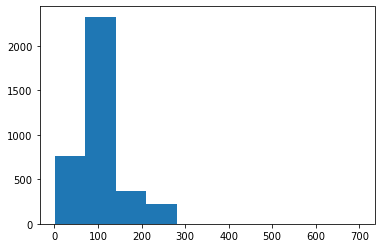

width


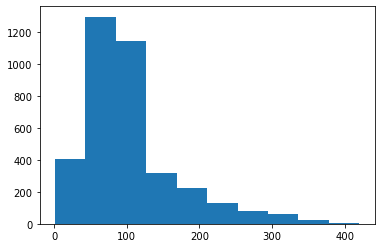

In [21]:
for col in ['price', 'depth', 'height', 'width']:
    print(col)
    plt.hist(df[col])
    plt.show()